In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,NaN,0.067351,3.53370,0.469590,0.67908,NaN,2.7924,2.77630,1.69910,3.815600,1.7464
1,-0.098505,-0.17857,2.062800,2.92160,NaN,1.17850,1.68020,1.3888,NaN,NaN,0.772910,NaN
2,-0.169460,0.50153,2.470900,3.06500,NaN,1.48240,0.92160,2.6424,1.51870,NaN,2.432800,1.8768
3,-0.136050,NaN,NaN,1.95630,2.787000,2.59570,2.89330,1.5375,0.99942,3.65930,0.618250,3.2658
4,NaN,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.1786,1.31400,NaN,1.026900,2.1884
...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,NaN,1.576000,0.55612,0.070769,2.07470,0.80304,3.2229,NaN,1.32550,NaN,NaN
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.3961,2.46350,1.66750,2.461700,1.2267
797,3.344800,NaN,2.031000,2.26460,3.341200,1.53700,1.22560,NaN,2.49540,1.34330,1.622500,1.5853
798,3.441400,-5.21630,1.577000,1.84400,1.098700,NaN,0.81081,3.7270,1.18790,0.95112,1.884500,1.1437


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	208
float64		column 2	211
float64		column 3	104
float64		column 4	104
float64		column 5	133
float64		column 6	159
float64		column 7	104
float64		column 8	156
float64		column 9	211
float64		column 10	159
float64		column 11	130
float64		column 12	211


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,592.000000,589.000000,696.000000,696.000000,667.000000,641.000000,696.000000,644.000000,589.000000,641.000000,670.000000,589.000000
mean,1.591659,1.358891,1.976393,1.920498,1.967774,2.001975,1.950490,2.029320,1.967516,2.018439,1.971909,1.969167
std,2.559827,3.442819,1.117120,1.127310,1.105980,1.073071,1.138806,1.068004,1.052087,1.082932,1.127766,1.025897
min,-4.442100,-6.952900,0.020547,0.002628,0.022079,0.002230,0.011923,0.004193,0.009369,0.002484,0.002000,0.015831
25%,-0.223155,-0.327460,1.054900,0.933975,1.040500,1.135900,1.005475,1.122700,1.136900,1.155900,1.027125,1.183000
50%,1.100050,0.522170,1.975100,1.895400,1.989900,1.976900,1.942050,2.030600,1.910600,2.039600,1.977250,1.956100
75%,3.854875,4.320100,2.857825,2.893000,2.823800,2.867500,2.906950,2.869725,2.838900,2.913800,2.899300,2.714500
max,6.771900,7.645900,3.992600,3.997300,3.988400,3.995100,3.999900,3.998200,3.984600,3.997600,3.990900,3.998300


<AxesSubplot:>

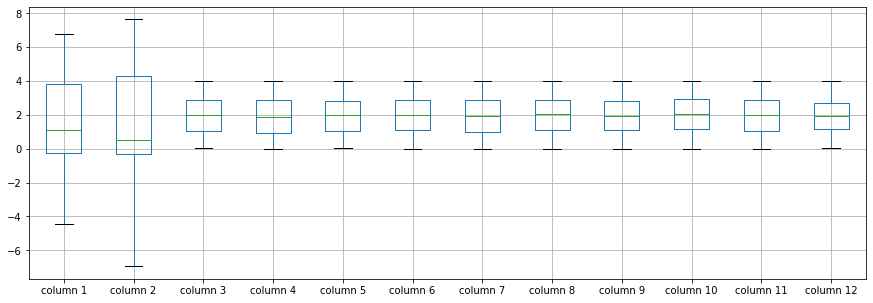

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.591659
column 2     1.358891
column 3     1.976393
column 4     1.920498
column 5     1.967774
column 6     2.001975
column 7     1.950490
column 8     2.029320
column 9     1.967516
column 10    2.018439
column 11    1.971909
column 12    1.969167
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.357434,0.020243,0.043001,0.014797,0.024227,0.002359,-0.000497,0.003984,-0.063756,0.022460,0.003556
column 2,-0.357434,1.000000,-0.051685,-0.059651,-0.041129,-0.025246,0.022646,0.015487,-0.027509,-0.065508,-0.034327,-0.037732
column 3,0.020243,-0.051685,1.000000,-0.058621,0.048808,0.024321,-0.017128,-0.016456,-0.047366,0.036789,-0.008341,0.020161
column 4,0.043001,-0.059651,-0.058621,1.000000,0.013819,-0.039267,0.019984,0.005586,-0.038745,0.023238,0.027871,-0.017778
column 5,0.014797,-0.041129,0.048808,0.013819,1.000000,0.040824,0.056528,-0.035875,-0.032184,-0.006998,0.020209,0.000271
column 6,0.024227,-0.025246,0.024321,-0.039267,0.040824,1.000000,-0.054565,0.031298,0.065124,0.010971,-0.011987,0.051147
column 7,0.002359,0.022646,-0.017128,0.019984,0.056528,-0.054565,1.000000,-0.014373,-0.027122,-0.059459,0.026932,-0.065318
column 8,-0.000497,0.015487,-0.016456,0.005586,-0.035875,0.031298,-0.014373,1.000000,-0.062447,-0.025064,-0.030474,-0.040435
column 9,0.003984,-0.027509,-0.047366,-0.038745,-0.032184,0.065124,-0.027122,-0.062447,1.000000,0.097104,-0.001395,0.019132
column 10,-0.063756,-0.065508,0.036789,0.023238,-0.006998,0.010971,-0.059459,-0.025064,0.097104,1.000000,-0.060926,0.062969


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+71,12+71+71,12+71+71+71,12+71+71+71+71,12+71+71+71+71+71,12+71+71+71+71,12+71+71+71,12+71+71,12+71,12], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.133981971740724
Epoch: 1 , loss: 22.521091270446778
Epoch: 2 , loss: 19.30034912109375
Epoch: 3 , loss: 18.326930389404296
Epoch: 4 , loss: 18.08095943450928
Epoch: 5 , loss: 17.806644649505614
Epoch: 6 , loss: 17.37263807296753
Epoch: 7 , loss: 17.244090480804445
Epoch: 8 , loss: 17.000967197418213
Epoch: 9 , loss: 16.80013551712036
Epoch: 10 , loss: 16.690110034942627
Epoch: 11 , loss: 16.655377769470213
Epoch: 12 , loss: 16.428166522979737
Epoch: 13 , loss: 16.33258550643921
Epoch: 14 , loss: 16.111687183380127
Epoch: 15 , loss: 15.93415397644043
Epoch: 16 , loss: 15.76687017440796
Epoch: 17 , loss: 15.690337028503418
Epoch: 18 , loss: 15.56105619430542
Epoch: 19 , loss: 15.739002075195312
Epoch: 20 , loss: 15.467110328674316
Epoch: 21 , loss: 15.681022720336914
Epoch: 22 , loss: 15.468590450286865
Epoch: 23 , loss: 15.5726517868042
Epoch: 24 , loss: 15.408365306854249
Epoch: 25 , loss: 15.482754

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     1.809520
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    1.778268
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.464549,0.000000,0.0,0.000000,0.000000,-2.325091,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,1.352470,0.000000,0.000000,0.000000,-1.470621,-1.162159,0.000000,1.181278
2,0.000000,0.000000,0.000000,0.0,-1.120404,0.000000,0.000000,0.000000,0.000000,-2.087846,0.000000,0.000000
3,0.000000,0.752891,1.352972,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.178066,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.583456,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.797151,3.518485,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-2.209351,0.000000,-1.911252,1.308869
796,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
797,0.000000,4.262584,0.000000,0.0,0.000000,0.000000,0.000000,2.132275,0.000000,0.000000,0.000000,0.000000
798,0.000000,0.000000,0.000000,0.0,0.000000,-1.641309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(99.12883508102433, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.3993555437769353

In [18]:
new_df.iloc[66,:]

column 1     0.207620
column 2     1.094197
column 3     2.339900
column 4     1.794800
column 5     1.401300
column 6     1.637916
column 7     1.304100
column 8     1.249300
column 9     1.583368
column 10    1.284300
column 11    1.879400
column 12    0.575240
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.625889,0.067351,3.53370,0.469590,0.679080,1.109309,2.792400,2.776300,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.92160,1.777190,1.178500,1.680200,1.388800,1.746079,1.761441,0.772910,1.822728
2,-0.169460,0.501530,2.470900,3.06500,0.447196,1.482400,0.921600,2.642400,1.518700,0.443954,2.432800,1.876800
3,-0.136050,1.225681,1.941062,1.95630,2.787000,2.595700,2.893300,1.537500,0.999420,3.659300,0.618250,3.265800
4,0.276896,0.234180,0.429700,1.63120,3.554100,2.271100,0.374250,2.178600,1.314000,0.479744,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.971849,0.831785,1.576000,0.55612,0.070769,2.074700,0.803040,3.222900,1.283949,1.325500,1.319848,1.314256
796,3.466600,-4.034600,3.100400,1.34610,1.377300,2.288700,0.396130,2.396100,2.463500,1.667500,2.461700,1.226700
797,3.344800,1.878284,2.031000,2.26460,3.341200,1.537000,1.225600,2.872545,2.495400,1.343300,1.622500,1.585300
798,3.441400,-5.216300,1.577000,1.84400,1.098700,1.782991,0.810810,3.727000,1.187900,0.951120,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_NN_20(imp).xlsx", index=False, header=False)